In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12,4)

# Solving complex ODEs

## Example of a complex ODE from physics

Here, we will look at an example of solving a complex valued ODE.  

A classic example of a complex ODE is that of the Harmonic oscillator, see this text from Haus chapter 7:

<img src=attachment:Screenshot%202019-06-01%20at%2021.31.24.png width=60%></img>

As discussed further in the next paragraphs, it is sufficient to consider only the positive frequency field variable, leading to a single differential equation describing the cavity: 

$$
\frac{da}{dt} = i\omega_0 a
$$

In this, we have reduced the original (real-valued) second-order differential equation with a single (complex-valued) first-order equation.

We can also easily add a damping with rate $\kappa$:

$$
\frac{da}{dt} = i\omega_0 a - \kappa a
$$

## Implementation in scipy

In the most recent version of scipy, it seems that `solve_ivp()` just directly supports complex valued differential equations: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp

although there is some caveats about the forms of the equations (which our functions likely all satisfy...?). 

Let's try it!

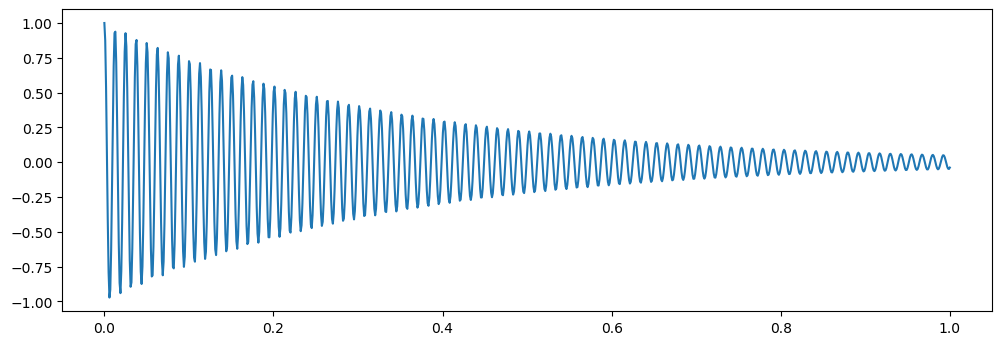

In [3]:
w0 = 500
kappa = 3

def dydt(t,y):
    return 1j*w0*y-kappa*y

# The 0j was important to get the correct variable type
y0 = 1+0j

T = 1
N= 1000
t = np.linspace(0,T,N)

sol = solve_ivp(dydt, [0,T], [y0], t_eval = t)
a = sol.y[0]+0j
plt.plot(t,np.real(a))

Works!

Let's try driven version.

BDF 1.27 sec
RK  0.24 sec


(0, 5)

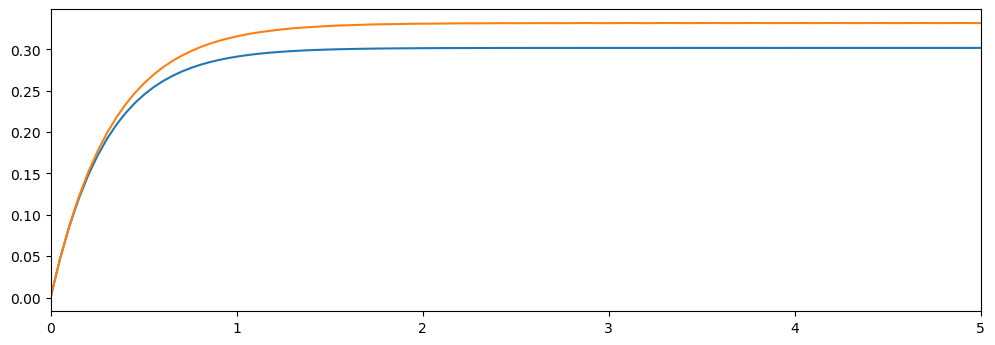

In [4]:
w0 = 500
kappa = 3
wd = 500

def dydt(t,y):
    return 1j*w0*y-kappa*y+np.exp(1j*wd*t)

# The 0j was important to get the correct variable type
y0 = 0j

# Had to decrease step size?
T = 5
N= 100
t = np.linspace(0,T,N)

t1 = time.time()
sol = solve_ivp(dydt, [0,T], [y0], t_eval = t, method="BDF")
t2 = time.time()
sol2 = solve_ivp(dydt, [0,T], [y0], t_eval = t)
t3 = time.time()

print("BDF %.2f sec" %(t2-t1))
print("RK  %.2f sec" %(t3-t2))

a = sol.y[0]
b = sol2.y[0]
plt.plot(t,np.abs(a))
plt.plot(t,np.abs(b))

plt.xlim(0,5)